### Youtube-Link - https://www.youtube.com/watch?v=PBNimE8ST2E
### Drive-Link - https://drive.google.com/file/d/1_vs_9a0hRKcMtW_RuV1SGhjtadBJ9FF4/view

In [3]:
# import warnings
# warnings.filterwarnings('ignore')
import sys
import matplotlib.pyplot as plt
import numpy as np

import gym
import Cartpole_PG_Methods

In [4]:
def test(agent,env,render = False):
    state = env.reset()

    r = 0

    done = False

    for i in range(200):
        action = agent.get_action(state)
        new_state,reward,done,_ = env.step(action[0])

        if render == True:
            env.render()
        state = new_state

        r += reward

        if done:
            break

        # print(done)

        # env.render(state)

    env.close()

    print("\n"+str(r))
    
def test_2(agent,env,render = False):
    state = env.reset()

    r = 0

    done = False

    for i in range(200):
        action = agent.get_action(state)
        new_state,reward,done,_ = env.step(action)

        if render == True:
            env.render()
        state = new_state

        r += reward

        if done:
            break

        # print(done)

        # env.render(state)

    env.close()

    print("\n"+str(r))

In [5]:
def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    plt.fill_between(range(mean.shape[0]),ub, lb,
                     color=color_shading, alpha=.5)
    # plot the mean on top
    plt.plot(mean, color_mean)


def plotting(returns,window_size = 100):
    averaged_returns = np.zeros(len(returns)-window_size+1)
    max_returns = np.zeros(len(returns)-window_size+1)
    min_returns = np.zeros(len(returns)-window_size+1)
    
    
    for i in range(len(averaged_returns)):
        averaged_returns[i] = np.mean(returns[i:i+window_size])
        max_returns[i] = np.max(returns[i:i+window_size])
        min_returns[i] = np.min(returns[i:i+window_size])
    
#     plt.plot(averaged_returns)
    
#     plot_mean_and_CI(averaged_returns,min_returns,max_returns,'g--','g')
    
    return (averaged_returns,max_returns,min_returns)

In [6]:
env = gym.make('CartPole-v0')

## Vanilla Policy Gradient
- In vanilla policy gradient, we try to train our neural network in such a way so as to maximize the loss function given below:
\begin{equation}
    \max_{\theta}J(\theta) = \sum_{\tau} P(\tau;\theta)R(\tau)
\end{equation}

where $\tau$ is the trajectory that we have sampled, $P(\tau;\theta)$ is the probability of trajectory $\tau$ and $R(\tau)$ is the reward corresponding to the trajectory $\tau$.
- Differntiating the above equation wrt $\theta$ gives the gradient of the objective function.Then we can easily apply Gradient ascent to maximize our objective function.

\begin{equation}
    \nabla_{\theta} J(\theta) = E[\nabla_{\theta} \log\pi_{\theta}(\tau)r(\tau)] \\ \approx \frac{1}{N}\sum_{i=1}^{N}\bigg(\sum_{t=1}^{T}\nabla_{\theta}\log\pi_{\theta}(a_{i,t}|s_{i,t})\bigg)\bigg(\sum_{t=1}^{T}r(s_{i,t}|a_{i,t})\bigg)
\end{equation}
- Implementation details:
    - First we play/sample a random episode on the basis of the current policy.
    - Then we compute the discounted rewards and the corresponding gradient of objective function.
    - Then we backpropagate this loss.
    
- The agent becomes trained in $\approx$ 3000 epochs. 

### Vanilla Policy Gradient without baseline

In [7]:
agent_VPG_without_baseline = Cartpole_PG_Methods.CartPole_agent(env,learning_rate = 3e-4,gamma = 0.99)

In [8]:
rewards_history = agent_VPG_without_baseline.train(max_episode = 3000,baseline = False)

Episode: 0, Episode Reward: 18.0, Average Reward: nan

/home/gaurav/Semester_5/SMAI/Hw_20/env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/gaurav/Semester_5/SMAI/Hw_20/env/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Episode: 2900, Episode Reward: 200.0, Average Reward: 195.25252525252526

### Plot of Average Reward v/s Number of episodes 

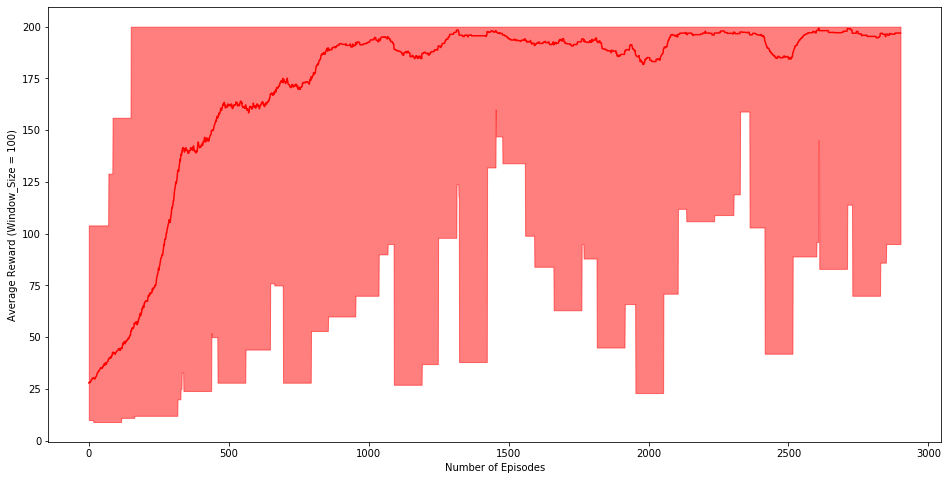

In [9]:
window_size = 100
average, min_returns, max_returns = plotting(rewards_history,window_size)
plt.figure(figsize = (16,8))
plot_mean_and_CI(average,min_returns,max_returns,'r','r')
plt.xlabel("Number of Episodes")
plt.ylabel("Average Reward (Window_Size = {})".format(window_size))
plt.show()

### Plot of Length of Episodes v/s Number of Episodes.

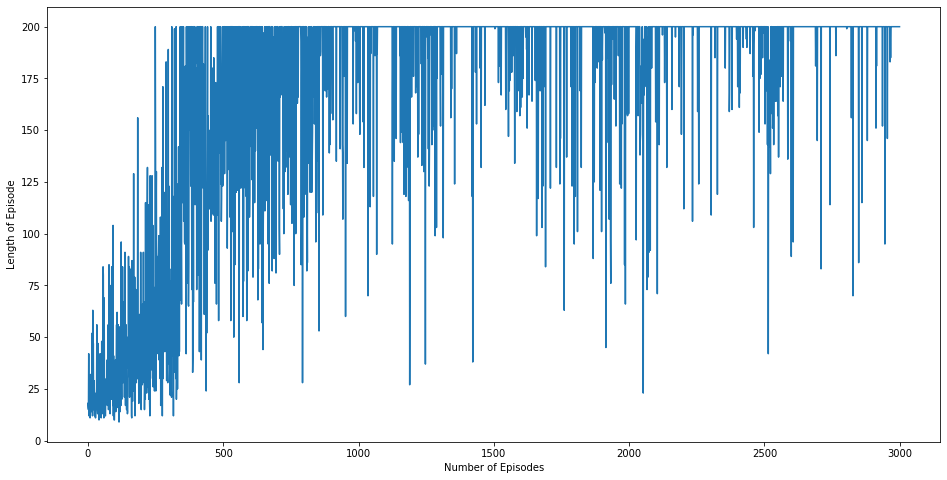

In [10]:
plt.figure(figsize = (16,8))
plt.plot(rewards_history)
plt.ylabel("Length of Episode")
plt.xlabel("Number of Episodes")
plt.show()

### Variance of discounted rewards.

In [11]:
print(np.var(agent_VPG_without_baseline.var_reward))

170.76289032063437


### Testing the trained model

In [12]:
for i in range(10):
    test(agent_VPG_without_baseline,env)


200.0

200.0

200.0

200.0

122.0

200.0

200.0

200.0

200.0

200.0


### Rendering the trained model

In [47]:
test(agent_VPG_without_baseline,env,render=True)


200.0


### Vanilla Policy Gradient with Baseline

### Significance of Baseline
- We can always subtract a term to the rewards as long as the term is not related to $\theta$.
- So instead of using the total reward, we subtract $b$.
- I tried various $b$ such as mean of rewards, spliting the rewards into 2 parts and subtracting mean of one half from other half, and using it in the objective function.
- I found taking $b$ = mean of rewards (discounted) gave the best results.

In [14]:
agent_VPG_with_baseline = Cartpole_PG_Methods.CartPole_agent(env,learning_rate=3e-4,gamma=0.99)

In [15]:
rewards_history_with_baseline = agent_VPG_with_baseline.train(max_episode = 2000,baseline = True)

Episode: 1900, Episode Reward: 194.0, Average Reward: 191.40404040404042

### Plot of Average Reward v/s Number of Episodes

In [16]:
window_size = 100
average, min_returns, max_returns = plotting(rewards_history_with_baseline,window_size)
plt.figure(figsize = (16,8))
plot_mean_and_CI(average,min_returns,max_returns,'r','r')
plt.xlabel("Number of Episodes")
plt.ylabel("Average Reward (Window_Size = {})".format(window_size))
plt.show()

### Plot of Length of Episode v/s Number of Episodes

In [17]:
plt.figure(figsize = (16,8))
plt.plot(rewards_history_with_baseline)
plt.ylabel("Length of Episode")
plt.xlabel("Number of Episodes")
plt.show()

### Variance of Discounted Rewards

In [18]:
print(np.var(agent_VPG_with_baseline.var_reward))

2.918834486706451e-11


### Testing of the Model

In [19]:
for i in range(10):
    test(agent_VPG_with_baseline,env)


200.0

200.0

200.0

200.0

200.0

184.0

200.0

200.0

200.0

200.0


### Vizualising the trained model

In [49]:
test(agent_VPG_with_baseline,env,render=True)


200.0


### Actor-Critic Policy Gradient

- As we saw in the previous part that baseline can be anything as long as it doesnot depend on $\theta$.
- Actor Critic Algorithm takes various forms based on the baseline chosen.
- Q Actor-Critic
\begin{equation}
    \nabla_{\theta}J(\theta) = E[\nabla_{\theta}\log\pi_{\theta}(s,a)Q^{w}(s,a)]
\end{equation}
- Advantage Actor Critic
\begin{equation}
    \nabla_{\theta}J(\theta) = E[\nabla_{\theta}\log\pi_{\theta}(s,a)A^{w}(s,a)]
\end{equation}
- In Actor-Critic Methods,
    - The "Critic" estimates the value function.This could be the action-value ($Q$ value) or the state-value ($v$ value)
    - The "Actor" updates the policy distribution in the direction suggested by the Critic. 
- I have used Advantage-Actor Critic Method, where the gradient of the objective function is as follows
\begin{equation}
   \nabla_{\theta}J(\theta) \approx \sum_{t=0}^{T-1}\nabla_{theta}\log\pi_{\theta}(a_{t}|s_{t})A(s_{t},a_{t})
\end{equation}
where
\begin{equation}
    A(s_{t},a_{t}) = r_{t+1} + \gamma V(s_{t+1}) - V(s_{t})
\end{equation}

In [5]:
env = gym.make('CartPole-v0')

In [34]:
agent_ac = Cartpole_PG_Methods.ActorCritic_agent(env,learning_rate = 3e-2,gamma = 0.99)

In [35]:
rewards_history_ac = agent_ac.train(max_episode = 1400)

Episode: 1300, Episode Reward: 57.0, Average Reward: 85.0707070707070786

### Plot of Average Rewards v/s Number of Episodes

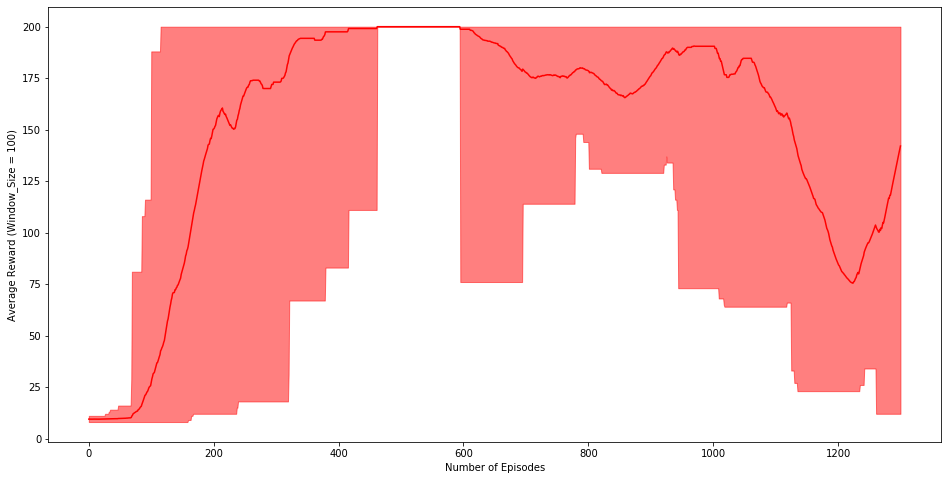

In [41]:
window_size = 100
average, min_returns, max_returns = plotting(rewards_history_ac,window_size)
plt.figure(figsize = (16,8))
plot_mean_and_CI(average,min_returns,max_returns,'r','r')
plt.xlabel("Number of Episodes")
plt.ylabel("Average Reward (Window_Size = {})".format(window_size))
plt.show()

### Plot of Length of Episode v/s Number of Episodes.

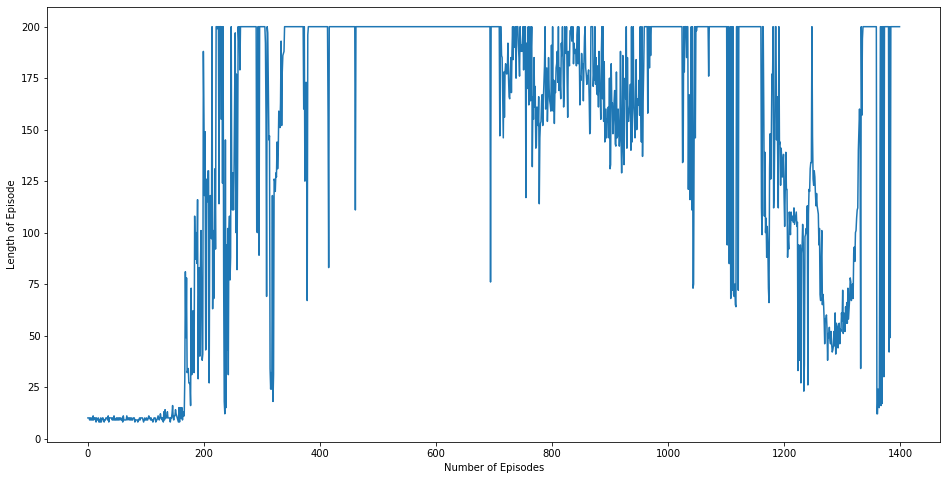

In [37]:
plt.figure(figsize = (16,8))
plt.plot(rewards_history_ac)
plt.ylabel("Length of Episode")
plt.xlabel("Number of Episodes")
plt.show()

### Testing of the model

In [50]:
for i in range(10):
    test_2(agent_ac,env)


200.0

200.0

200.0

200.0

200.0

200.0

200.0

200.0

200.0

200.0


### Rendering of the model.

In [53]:
test_2(agent_ac,env,render=True)


200.0


## References
- https://towardsdatascience.com/an-intuitive-explanation-of-policy-gradient-part-1-reinforce-aa4392cbfd3c
- https://medium.com/@thechrisyoon/deriving-policy-gradients-and-implementing-reinforce-f887949bd63
- https://github.com/pytorch/examples/tree/master/reinforcement_learning